# Import modules

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import numpy as np

# II. Exploring data

In [2]:
file = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
file.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


### Kiểm tra xem có bao nhiều dòng và cột trong dữ liệu | dataset

In [4]:
num_rows, num_cols = file.shape
file.shape

(63023, 13)

### Ý nghĩa của từng dòng trong dữ liệu | dataset

Theo dữ liệu mô tả và yêu cầu của tác giả của chủ đề "Melbourne Housing Market". Melbourne ở Úc đã trải qua hiện tượng bong bóng nhà đất (một số chuyên gia cho rằng nó có thể vỡ sớm) trong năm 2016 - 2017.

    Và theo sự quan sát sơ bộ về tập dữ liệu thì một đòng cho biết thông tin của một ngôi nhà đang được rao giá, và hầu hết dữ liệu đều như vậy.

### Kiểm tra xem có dòng nào bị trùng trong bộ dữ liệu không ?

In [5]:
have_duplicated_rows = bool
dup_df = file[file.duplicated(keep=False)]
if len(dup_df) == 0:
    have_duplicated_rows = False
else:
    have_duplicated_rows = True
print(have_duplicated_rows)
dup_df

True


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
8041,Fitzroy North,5/16 Taplin St,2,h,1010000.0,SP,Woodards,5/05/2018,3068,Northern Metropolitan,6244,3.6,Moreland City Council
8042,Fitzroy North,5/16 Taplin St,2,h,1010000.0,SP,Woodards,5/05/2018,3068,Northern Metropolitan,6244,3.6,Moreland City Council
33941,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,3131,Eastern Metropolitan,4973,15.4,Manningham City Council
33942,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,3131,Eastern Metropolitan,4973,15.4,Manningham City Council


Từ kết quả trên ta có thể dễ nhận thấy dữ liệu bị trùng, nối tiếp nhau. Dòng 8042 lặp lại của dòng 8041 và 33942 lặp lại của 33941.

    Kết luận có lẽ vào thời điểm đó tác giả ngừng thu thập dữ liệu và ngày tiếp theo vẫn tiếp tục lưu trữ bị trùng ở mặt đó

### Mỗi cột sẽ có ý nghĩa như thế nào ?

Mô tả về các cột | attributes của tập dữ liệu "MELBOURNE_HOUSE_PRICES_LESS.csv".
- **Suburb**: ngoại ô, nơi không nằm trong khu vực của Melbourne CBD.
- **Address**: địa chỉ của ngôi nhà.
- **Rooms**: số lượng phòng có trong ngôi nhà.
- **SellerG**: đại lí bất động sản
- **Date**: ngày được bán
- **Regionname**: khu vực trong Melbourne CBD
- **Propertycount**: số lượng bất động sản tồn tại ở vùng ngoại ô (Suburb)
- **Distance**: khoảng cách kilometers từ ngôi nhà so với Melbourne CBD (trung tâm thương mai Melbourne) 
- **CouncilArea** Hội động quản trị khu vực (Governing council for the area)
- **PostCode**: mã bưu chính
- **Price**: giá ngôi nhà
<br> </br>
- **Type**: phân loại của ngôi nhà
    - Nếu là **br** - bedroom(s);
    - Nếu là **h** - house,cottage,villa, semi,terrace;
    - Nếu là **u** - unit, duplex;
    - Nếu là **t** - townhouse;
    - Nếu là **dev site** - development site;
    - Nếu là **o res** - other residential.  
- **Method**: phương thức giao dịch bất động sản
    - Nếu là **S** - property sold;
    - Nếu là **SP** - property sold prior;
    - Nếu là **PI** - property passed in;
    - Nếu là **PN** - sold prior not disclosed;
    - Nếu là **SN** - sold not disclosed;
    - Nếu là **NB** - no bid;
    - Nếu là **VB** - vendor bid;
    - Nếu là **W** - withdrawn prior to auction;
    - Nếu là **SA** - sold after auction;
    - Nếu là **SS** - sold after auction price not disclosed.
    - Nếu là **N/A** - price or highest bid not available.

### Kiểm tra từng kiểu dữ liệu của từng cột. Có cột nào có dữ liệu chưa phù hợp hay không ?

In [6]:
file.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

Hiện tại có dữ liệu của cột <b>Date</b> chưa đúng với dạng "daytime", xử lí dữ liệu phần dưới !

In [3]:
file['Date'] = pd.to_datetime(file['Date'])
file.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


# Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?
Các cột numeric gồm có "Price", "Date", "Distance"

In [8]:
numeric_df = file[["Price", "Date", "Distance"]]
percent_missing = numeric_df.isnull().sum() * 100 / len(numeric_df)
percent_missing = round(percent_missing, 2)
min_df = numeric_df.min(axis = 0)
max_df = numeric_df.max(axis = 0)
nume_col_profiles_df = pd.DataFrame([percent_missing, min_df, max_df], index=['missing_ratio', 'min', 'max'])
nume_col_profiles_df

,Price,Date,Distance
missing_ratio,23.15,0.0,0.0
min,85000.00,2016-01-28 00:00:00,0.0
max,11200000.00,2018-12-05 00:00:00,64.1


# Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?
Các côt categorical gồm có "Suburb", "Address", "Rooms", "Type", "Method", "SellerG", "Postcode", "Regionname", "Propertycount", "CouncilArea"

In [10]:
categorical_df = file[["Suburb", "Address", "Rooms", "Type", "Method", "SellerG", "Postcode", "Regionname", "Propertycount", "CouncilArea"]]
percent_missing = categorical_df.isnull().sum() * 100 / len(numeric_df)
percent_missing = round(percent_missing, 2)
num_unique_values = categorical_df.nunique()
lst = []
for col in categorical_df:
    lst.append(categorical_df[col].dropna().unique())
unique_values = pd.Series(lst, index=["Suburb", "Address", "Rooms", "Type", "Method", "SellerG", "Postcode", "Regionname", "Propertycount", "CouncilArea"])
cate_col_profiles_df = pd.DataFrame([percent_missing, num_unique_values, unique_values], index=['missing_ratio', 'num_diff_vals', 'diff_vals'])
cate_col_profiles_df

,Suburb,Address,Rooms,Type,Method,SellerG,Postcode,Regionname,Propertycount,CouncilArea
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,380,57754,14,3,9,476,225,8,368,34
diff_vals,"[Abbotsford, Aberfeldie, Airport West, Albanva...","[49 Lithgow St, 59A Turner St, 119B Yarra St, ...","[3, 2, 6, 4, 1, 5, 7, 8, 11, 10, 12, 9, 31, 16]","[h, t, u]","[S, SP, PI, SN, VB, PN, SA, W, SS]","[Jellis, Marshall, Nelson, Barry, hockingstuar...","[3067, 3040, 3042, 3021, 3206, 3020, 3078, 301...","[Northern Metropolitan, Western Metropolitan, ...","[4019, 1543, 3464, 1899, 3280, 2185, 2211, 530...","[Yarra City Council, Moonee Valley City Counci..."


In [25]:
fig = px.histogram(file['Price'], x="Price", color_discrete_sequence=['indianred'], title='Price Distributions')
fig.show()


<AxesSubplot:xlabel='Month', ylabel='Total_sales'>

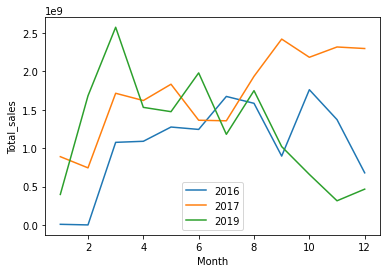

In [62]:
file['Month'] = file['Date'].dt.month
file['Year'] = file['Date'].dt.year

idx = np.array(range(12)) + 1
     
temp_df = file[["Price", "Month", "Year"]]
total_sales_each_month_series = temp_df.groupby(['Month','Year']).sum()

lst = list(total_sales_each_month_series['Price'])
lst.insert(3, 0)
lst = np.reshape(lst, (12, 3))
total_sales_each_month_df = pd.DataFrame(lst, columns=[2016, 2017, 2018], index=idx)
total_sales_each_month_df.plot.line(xlabel='Month', ylabel='Total_sales')

Năm 2016 và 2017, tổng số doanh thu bất động sản ở Melbourne có xu hướng tăng và đến tháng 3 năm 2018 đạt đỉnh, nhưng sau khoảng thời gian đó, hầu như doanh giảm và giảm một cách rát nhanh chóng, đến tháng 11 thì doanh thu chi đạt ở mức khoảng 0.4B AUD, thấp hơn rất nhiều so với năm 2016 

--> nhà được bán vào 2018 ít hơn 2 năm trước hay giá nhà bị giảm ? hoặc có điều j đó tác động vào điều này ?

In [73]:
milestone_df = file[(file['Month'] == 3) & (file['Year'] == 2018)]
num_house = []
num_house.append(len(milestone_df))
for i in range(4, 13, 1):
    slow_down_df = file[(file['Month'] == i) & (file['Year'] == 2018)]
    num_house.append(len(slow_down_df))
num_house

[3091, 2122, 1864, 2851, 1837, 2372, 1428, 1035, 428, 616]

<AxesSubplot:xlabel='Month', ylabel='Total_num_house'>

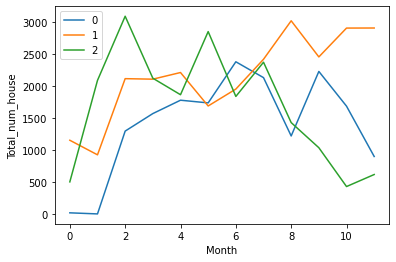

In [100]:
num_house = []
for i in range(3):
    for j in range(12):
        slow_down_df = file[(file['Month'] == j + 1) & (file['Year'] == 2018 - i)]
        num_house.append(len(slow_down_df))
num_house = np.reshape(num_house, (3, 12))
num_house = zip(*num_house[::-1])
num_house = np.flip(num_house, axis=None)
total_num_house_each_month_df = pd.DataFrame(num_house)
total_num_house_each_month_df.plot.line(xlabel='Month', ylabel='Total_num_house')

<AxesSubplot:xlabel='Month', ylabel='Prices'>

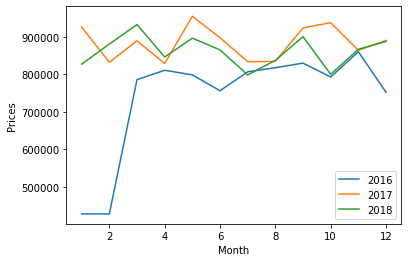

In [117]:
region_df = file[(file['Type'] == 'h') & (file['Rooms'] == 3) & (file['Regionname'] == 'Northern Metropolitan')]
region_df = region_df[["Price", "Month", "Year"]]

mean_df = region_df.groupby(['Month','Year']).mean()

lst = list(mean_df['Price'])
lst.insert(3, lst[0])
lst = np.reshape(lst, (12, 3))
change_df = pd.DataFrame(lst, columns=[2016, 2017, 2018], index=idx)
change_df.plot.line(xlabel='Month', ylabel='Prices')